# Assignment 6

**Deadline**:  16/10/2019, 9.59am

**Names and student numbers:**
1. name (student number)
2. ...
3. ...

**Declaration of Originality**

We whose names are given under 1., 2. and 3. above declare that:
1. These solutions are solely our own work.
2. We have not made (part of) these solutions available to any other student.

## Instructions for completing and submitting the assignment
Please pay attention to the following instructions:
1. Please follow carefully the steps outlined in the assignment. If you cannot solve an exercise and this hinders continuing with subsequent exercises, try to find a way to work around it and give a clear explanation for the solution you have chosen.
2. Submit your work in the form of a Jupyter notebook via Canvas, before the deadline. Your notebook should not give errors when executed with `Run All`.
4. You are allowed to work on the assignment in groups of 2 or 3 students and to submit together. Before you submit, you and your team members have to register as an **Assignment group** on Canvas. Only a single member of each group has to submit the notebook. Please do **NOT** submit the same notebook multiple times!
5. Please write your names also inside this markdown cell, under **Names and student numbers**.

**Exercise:** import the relevant libraries.

In [4]:
import os
import numpy as np
import pandas as pd
import scipy
from scipy import stats
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

# Instructions
In this assignment you have to develop a classification model. You will be given a training set of 528 datapoints. Using the techniques presented in this course, we ask you to come up with a model that has the best generalization performance. This performance will be assessed on a test dataset of 462 datapoints, which is not available to you. The assignment is also a competition: your mark depends (partly) on how well your model does compared to those of other groups and the three groups with the best performing model will be highlighted.

### The data
The training data can be found in the file `DSM_assignment6_training_data.csv` on Canvas. It consists of a two-dimensional comma-separated matrix of 528 rows and 11 columns. Each row is a datapoint, consisting of 10 input variables and 1 target variable. The target variable, which is an integer from the set {0,1,...,10} representing the class, is the last column of the matrix.

### Submitting your work
Your work in this Jupyter notebook consists of two parts. **Part 1** is used to train, create and evaluate your best performing model. In the first cell, you have to train your best performing model on the training data. The code to load the training data is already given. Furthermore, in that same cell you have to create a function called `best_model`. This function has a single input argument, which is a 2-dimensional NumPy array with an arbitrary number of rows and 10 columns (e.g. the input features `X` of the training data). The function should return a 1-dimensional array with the predictions of your best model for the datapoints in the input argument, where each prediction should be an integer from the set {0,1,...,10}. Hence, the number of elements in this 1-dimensional array should be equal to the number of rows of the 2-dimensional array used as input argument.

In the second cell, we are using a testset called `DSM_assignment6_test_data.csv` of 462 datapoints to assess the generalization performance of your function `best_model`. Of course, the testset is only available to the teachers. The code in the second cell may not be changed!!! It will be used by the teachers to compute the generalization performance of your best model. On Canvas, you can find a file called `DSM_assignment6_FAKE_test_data.csv`. This is a 2-dimensional array of completely random numbers (fake data), having the same dimensions as the dataset in `DSM_assignment6_test_data.csv`. If you put this file in the same folder as this Jupyter notebook, you can test whether your function `best_model` is defined correctly by checking if the second cell runs without errors. Since the numbers in `DSM_assignment6_FAKE_test_data.csv` are fake data, they **cannot** be used to estimate the performance of your `best_model`. **AFTER TRAINING AND CREATING YOUR BEST MODEL IN THE FIRST CELL, THE SECOND CELL SHOULD RUN WITHOUT ERRORS!!!** If this is not the case, your work will **not** be marked. 

In **Part 2** of the notebook, you will present your analysis of the classification problem and the steps you have taken to arrive at your best model. Here, you have to explain and perform all the methods that you have used to identify your best model. As in all exercises, please make sure all steps are well motivated and presented in a clear and structured manner. We recommend using visualization methods (e.g., plots with matplotlib), if applicable, to clarify your work.

### Example
As an example, in this notebook we have defined a `best_model` that randomly assigns a class to every new observation. As expected, the obtained accuracy of this primitive model is around $1/11=0.0909$, since there are 11 classes.

### Allowed methods
Any of the methods discussed in the course may be used. You are also free to use generalizations of these methods. If you doubt whether your method is allowed, please consult with the teachers. 

Furthermore, you are allowed to use libraries like scikit-learn, but you are not required to use them.

### The competition
The generalization performance of your best model is assessed by the **accuracy**, which we define as the proportion of correctly predicted classes, on a secret test dataset consisting of 462 datapoints. You may assume that all datapoints in the training and test set are i.i.d. The scores will be ranked and the top-three groups and their scores will be announced.

### The marking
As can be seen in the rubric on Canvas, 20% of your mark will depend on the generalization performance of your best model, compared to the best models of your peers.

# Part 1: training, creating and evaluating your best model

In [7]:
#####################################################
# USE THIS CELL TO TRAIN AND CREATE YOUR BEST MODEL # 
#####################################################

# loading the training data
training_data = np.genfromtxt("DSM_assignment6_training_data.csv", delimiter=',')
X = training_data[:,:-1]
y = training_data[:,-1].astype(int)
K_classes = np.unique(y).shape[0]
X = StandardScaler().fit_transform(X)

def best_model(X_new):
    
    N_new = X_new.shape[0]
    
    return np.random.randint(11, size=N_new)

In [45]:
# Correlation coefficient matrix of X
#pd.DataFrame(np.corrcoef(X, rowvar = False))

In [46]:
def kNN(X_new, X, y, k):
    
    predictions = np.array([], dtype=int)
    
    for x in X_new:
        
        distances = np.linalg.norm(X-x, axis=1)
        indices = np.argpartition(distances, k-1)[:k]
        
        predictions = np.append(predictions, np.argmax(np.bincount(y[indices])))
    
    return predictions

def kNN_CV_accuracy(X, y, k):
    
    N = len(X)
    
    errors = np.array([y[i] == kNN([X[i]], np.delete(X, i, axis=0), np.delete(y, i), k) for i in range(N)])
    
    return np.mean(errors)

kNN_CV_accuracy(X, y, 5)

0.9488636363636364

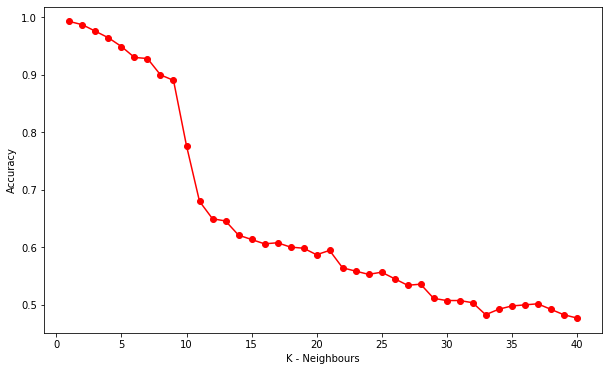

In [47]:
def accuracy_lists(X,y,k):

    acc_list = np.array([])
    k_list = np.arange(1,k+1)

    for i in range(1,k+1):
        acc_list = np.append(acc_list, kNN_CV_accuracy(X,y,i))
    
    return k_list, acc_list

fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(1,1,1)
ax1.plot(accuracy_lists(X,y,40)[0], accuracy_lists(X,y,40)[1], '-o', color='red')

ax1.set_xlabel('K - Neighbours')

ax1.set_ylabel('Accuracy');

In [75]:
def plot_classification(X, y, K, dir1, dir2, G=None, title=None):
    
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(1,1,1)
    
    if title:
        ax.set_title(title)
    
    colors = ['k','tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray','tab:olive','tab:cyan']
    
    if np.isscalar(dir1):
        dir_temp = np.zeros(X.shape[1])
        dir_temp[dir1] = 1.
        dir1 = dir_temp
        
    if np.isscalar(dir2):
        dir_temp = np.zeros(X.shape[1])
        dir_temp[dir2] = 1.
        dir2 = dir_temp
    
    dir1 = dir1/np.linalg.norm(dir1)
    dir2 = dir2/np.linalg.norm(dir2)
    
    # Plotting the observations in the data set
    for k in range(K):
        boolean_index = y==k
        ax.scatter(np.dot(X[boolean_index], dir1), np.dot(X[boolean_index],dir2), 
                   c=colors[k])    
    
    # Creating classification regions
    if G:
        points = 100
        xmin, xmax = ax.get_xlim()
        ymin, ymax = ax.get_ylim()
        x_range = np.linspace(xmin, xmax, points)
        y_range = np.linspace(ymin, ymax, points)
        xx, yy = np.meshgrid(x_range, y_range)
    
        G_grid = np.array(list(map(G, np.outer(xx,dir1) + np.outer(yy,dir2)))).reshape(points,points)
    
        ax.contourf(x_range, y_range, G_grid, 2, alpha=.2, colors=colors)
    
    ax.set_xlabel("Direction 1: {}".format(dir1))
    ax.set_ylabel("Direction 2: {}".format(dir2))

    ax.legend();

In [48]:
#######
# PCA #
#######

U, D, VT = np.linalg.svd(X, full_matrices=False)

Z = np.empty(X.shape)
Z = U@np.diag(D)

print(np.allclose(X, (U*D[None, :])@VT))
print(np.allclose(np.identity(U.shape[1]),U.T@U))
print(np.allclose(np.identity(VT.shape[1]),VT.T@VT))

print("U: ",U.shape, "\tD: ", D.shape, "\tV: ",  VT.shape)

# Plotting the results
var_explained = D/sum(D)
var_explained_sum = np.cumsum(var_explained)

x_range = list(range(1,len(var_explained_sum)+1))

#fig2 = plt.figure(2, figsize=(8,6))
ax1 = fig2.add_subplot(1,1,1)

ax1.bar(x_range, var_explained_sum)
ax1.set_xlim([0,11])
ax1.set_xlabel('Singular values')
ax1.set_xticks(np.arange(1,11,step=1));

ax1.set_ylabel('Cumulative Variance');

True
True
True
U:  (528, 10) 	D:  (10,) 	V:  (10, 10)


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


In [49]:
print(kNN_CV_accuracy(X,y,3))
print(kNN_CV_accuracy(Z,y,3))
print(kNN_CV_accuracy(Z[:,:5],y,3))

0.9753787878787878
0.9753787878787878
0.9621212121212122


In [50]:
### Different matrices to train the models with ###

Z = U@np.diag(D)
Z_reduced = Z[:,:3]

def polynomial_features(X, M):
    return np.concatenate(tuple([X**(n+1) for n in range(M+1)]), axis=1)

Z_reduced_poly = polynomial_features(Z_reduced, 2)
Z_reduced_poly.shape

(528, 9)

In [51]:
#### Function to calculate accuracy of different models ###

def accuracy(training_method, X, y, K_classes, K_cv=10, runs=1):
    
    N = len(y)
    
    misclassifications = np.array([])
    for run in range(runs):
        
        cv_folds = KFold(n_splits=K_cv, shuffle=True) # Randomly creating new folds for each run
        
        for indices_train, indices_test in cv_folds.split(X):
            
            X_train = X[indices_train]
            y_train = y[indices_train]
            X_test = X[indices_test]
            y_test = y[indices_test]

            G_fitted = training_method(X_train, y_train, K_classes) # Fitting model in training data
            y_fitted_test = G_fitted(X_test) # Using fitted model to predict on test data

            no_misclassifications = np.sum(y_fitted_test != y_test) # Counting number of prediction errors test data
            misclassifications = np.append(misclassifications, no_misclassifications)
    
    accuracy = 1 - np.sum(misclassifications)/(N*runs)
    std_error = np.std(misclassifications, ddof=1)*np.sqrt(K_cv/runs)/N
    
    return accuracy, std_error

In [35]:
###########
### LDA ###
###########

# Use only y to detect ratio of a class, pi
def get_prior_probs(y):
    
    N = len(y)
    freqs = np.unique(y, return_counts = True)[1]
    
    return freqs/N

# Find mu as matrix with rows K and columns 4 with mean of features per class 
def get_centroids(X, y, K_classes):
    
    centroids = np.zeros((K_classes, X.shape[1]))
    
    for k in range(K_classes):  
        centroids[k] = np.mean(X[y==k], axis = 0)
    
    return centroids

# Find the 4 by 4 covariance matrix which is the same per class
def get_within_class_covariance_matrix(X, y, K_classes, centroids):
    
    N = len(y)
    X_diff = X - np.array([centroids[k] for k in y])
    
    return (X_diff.T @ X_diff)/(N-K_classes)

centroids = get_centroids(X, y, K_classes)

# Obtain the delta
def train_lda_classification(X, y, K_classes):
    
    probs = get_prior_probs(y)
    centroids = get_centroids(X, y, K_classes)
    cov = get_within_class_covariance_matrix(X, y, K_classes, centroids)
    inv_cov = np.linalg.inv(cov)
    
    def G(X_new):
        
        deltas = np.zeros((X_new.shape[0], K_classes))
        for k in range(K_classes):
            deltas[:,k] = (X_new - centroids[k]/2) @ inv_cov @ centroids[k] + np.log(probs[k])
        
        return np.argmax(deltas, axis=1)
    
    return G

G_fitted = train_lda_classification(X, y, K_classes)
#G_fitted(X)
accuracy(train_lda_classification, X, y , K_classes, K_cv=10, runs=1)

(0.6117424242424243, 0.029238727719468206)

In [ ]:
########################
### Reduced Rank LDA ###
########################

def get_between_class_covariance(centroids, K_classes):
    return np.dot(centroids.T, centroids)/(K_classes - 1)

def get_linear_discriminants(X, y, K_classes):
    
    centroids = get_centroids(X, y, K_classes)

    Sigma = get_within_class_covariance_matrix(X, y, K_classes, centroids)

    B = get_between_class_covariance(centroids, K_classes)
    
    eig_vals, eig_vecs = np.linalg.eig(np.dot(np.linalg.inv(Sigma), B))
    
    return eig_vals.real, eig_vecs.real

eig_vals, eig_vecs = get_linear_discriminants(X, y, K_classes)

print("Explained variance per eigenvalue/linear discriminant:")
for i, eig_val in enumerate(eig_vals):
    print("eigenvalue {0}: {1:.2%}".format(i+1, np.abs(eig_val/sum(eig_vals))))
    
# Projecting onto the linear discriminant (directions)
Z = np.dot(X, eig_vecs)

# Computing accuracies
for i in range(len(eig_vals)):
    
    Z_reduced = Z[:,:i+1]
    
    acc = accuracy(train_lda_classification, Z_reduced, y, K_classes, K_cv=10, runs=10)
    print("accuracy taking into account the first {0} linear discriminants: {1}".format(i+1, acc))

for i in range(6):
    Z_reduced = Z[:,:i+1]
    for j in range(10):
        poly = PolynomialFeatures(j+1, include_bias=False)
        Z_polynomial = poly.fit_transform(Z_reduced)
    
        acc = accuracy(train_lda_classification, Z_polynomial, y , K_classes, K_cv=10, runs=1)
        print("accuracy taking into account the first {0} lin comb and {1} pol features: {2}".format(i+1, j+1, acc))

        
# Plotting
#G_fitted =  train_lda_classification(Z_polynomial, y, K_classes)
#plot_classification(Z_polynomial, y, K_classes, 0, 1, G=G_fitted)


#Z_reduced_poly = polynomial_features(Z_reduced, 2)
#accuracy(train_lda_classification, Z_reduced_poly, y , K_classes, K_cv=10, runs=1)

Explained variance per eigenvalue/linear discriminant:
eigenvalue 1: 92.82%
eigenvalue 2: 4.82%
eigenvalue 3: 1.42%
eigenvalue 4: 0.50%
eigenvalue 5: 0.22%
eigenvalue 6: 0.12%
eigenvalue 7: 0.08%
eigenvalue 8: 0.01%
eigenvalue 9: 0.00%
eigenvalue 10: 0.00%
accuracy taking into account the first 1 linear discriminants: (0.2526515151515152, 0.006099579121463848)
accuracy taking into account the first 2 linear discriminants: (0.5916666666666667, 0.0062746762682238276)
accuracy taking into account the first 3 linear discriminants: (0.6350378787878788, 0.006702063408143739)
accuracy taking into account the first 4 linear discriminants: (0.6424242424242423, 0.0067420846101904275)
accuracy taking into account the first 5 linear discriminants: (0.6488636363636364, 0.0064741853479721185)
accuracy taking into account the first 6 linear discriminants: (0.6539772727272728, 0.005696815987854695)
accuracy taking into account the first 7 linear discriminants: (0.6535984848484848, 0.005899531315566276

In [18]:
###########
### QDA ###
###########

def get_per_class_covariance_matrix(X, y, K_classes, centroids):
    X_diff = X - np.array([centroids[k] for k in y])
    class_cov = []
    
    for k in range(K_classes):
        class_cov.append(np.sum(np.array([np.outer(Help, Help) for Help in X_diff[y == k]]), axis=0)/(sum(y==k)-1))
        
    return class_cov

# Obtain delta
def train_qda_classification(X, y, K_classes):

    probs = get_prior_probs(y)
    centroids = get_centroids(X, y, K_classes)
    class_cov = get_per_class_covariance_matrix(X, y, K_classes, centroids)
    inv_cov = np.linalg.inv(class_cov)
    def G(X_new):
        
        deltas = np.zeros((X_new.shape[0], K_classes))
        for k in range(K_classes):
            deltas[:,k] = np.diagonal(-((X_new - centroids[k]) @ inv_cov[k] @ (X_new - centroids[k]).T)/2 + np.log(probs[k]) - 1/2 * np.log(np.linalg.det(class_cov[k])))
        return np.argmax(deltas, axis=1)
    return G

accuracy(train_qda_classification, X, y , K_classes, K_cv=8, runs=3)

In [19]:
accuracy(train_qda_classification, X, y , K_classes, K_cv=8, runs=3)

(0.922979797979798, 0.006112308741990999)

In [9]:
######################################################
#    !!!DO NOT CHANGE THE CODE IN THIS CELL!!!       #
# THIS CELL IS USED FOR EVALUATING YOUR BEST MODEL.  #  
# AFTER TRAINING AND CREATING YOUR BEST MODEL IN THE #
# PREVIOUS CELL, THIS CELL SHOULD RUN WITHOUT ERRORS # 
######################################################

# Determining which test data will be used. If real test 
# data is available, it will be used. Otherwise, the 
# fake test data will be used.
if os.path.exists("DSM_assignment6_test_data.csv"):
    test_data_filename = "DSM_assignment6_test_data.csv"
elif os.path.exists("DSM_assignment6_FAKE_test_data.csv"):
    test_data_filename = "DSM_assignment6_FAKE_test_data.csv"
else:
    test_data_filename = None
    print("ERROR: Test data is missing!")
    
if test_data_filename:

    # loading the test data    
    test_data = np.genfromtxt(test_data_filename, delimiter=',')
    X_test = test_data[:,:-1]
    y_test = test_data[:,-1].astype(int)

    # making predictions and computing the accuracy (by averaging over 20 runs to reduce randomness)
    accuracies= np.array([])
    for i in range(20):
        predictions = best_model(X_test)
        accuracy = np.mean(predictions == y_test)
        accuracies = np.append(accuracies, accuracy)

    print("The accuracy is: ", np.mean(accuracies))

The accuracy is:  0.09134199134199135


# Part 2: analysis